## 2

install python and jupyter vscode extension

In [8]:
import numpy as np
import graph_tool.all as gt
from collections import Counter
import matplotlib.pyplot as plt
import json
import pandas as pd
import csv
import random


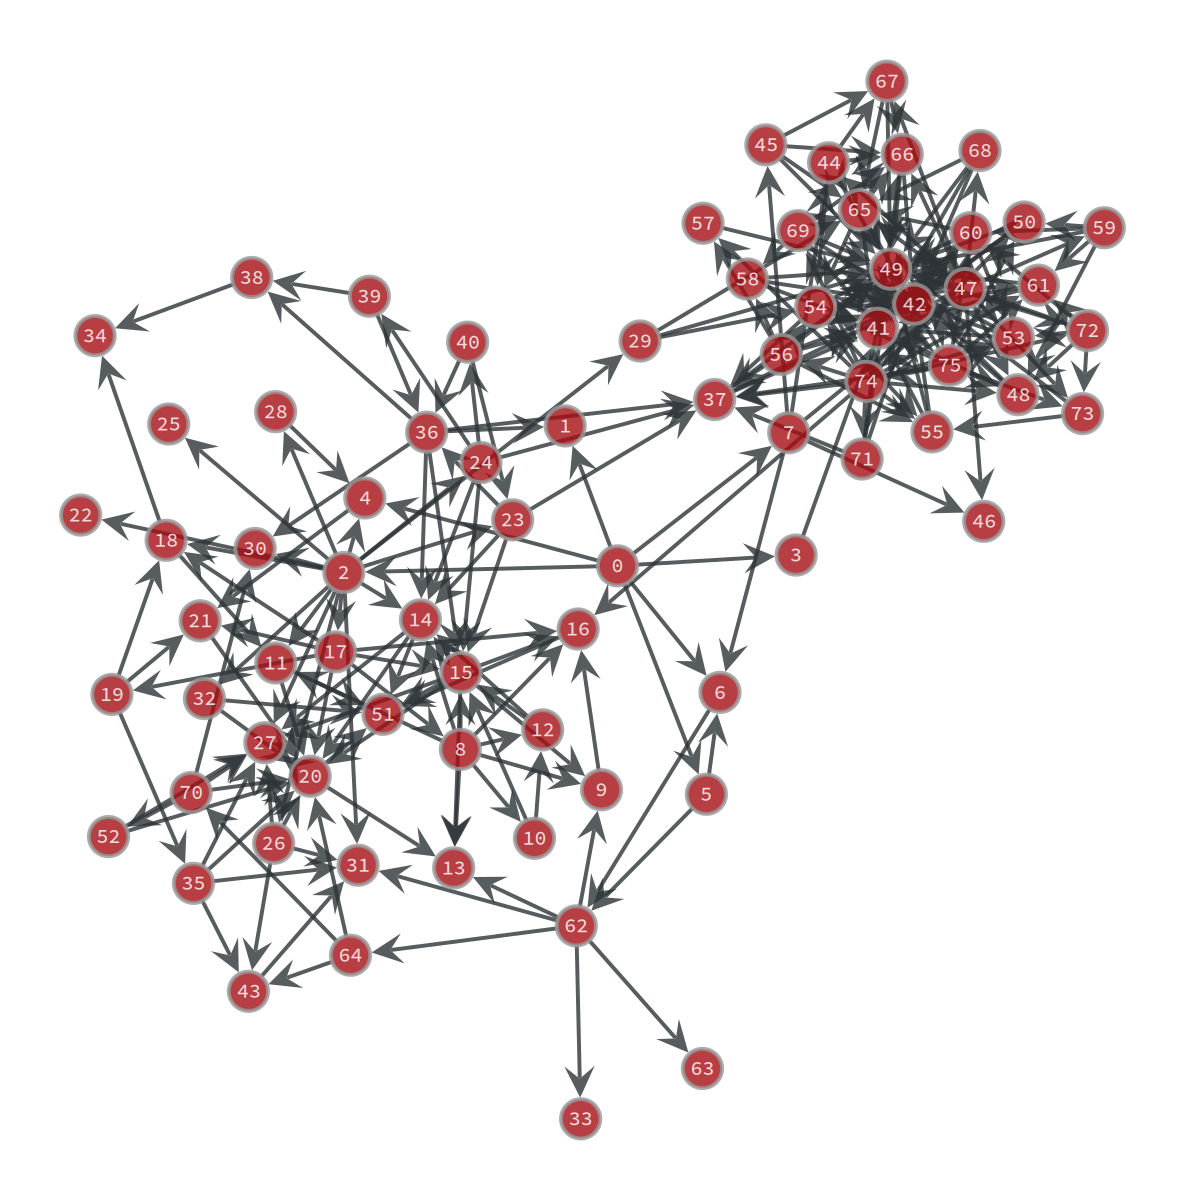

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f3f80504440, at 0x7f3f7e27ba70>

In [18]:
import json
import graph_tool.all as gt
import matplotlib.pyplot as plt


g = gt.load_graph("/notebooks/dependency_graph.graphml")

gt.graph_draw(g, vertex_text=g.vertex_index, vertex_font_size=10,  bg_color="white", 
    arrow_size=0.5)


Most dependencies (descendants)

### Katz centrality

https://en.wikipedia.org/wiki/Katz_centrality

influence is towards nodes with dependents or predecessors


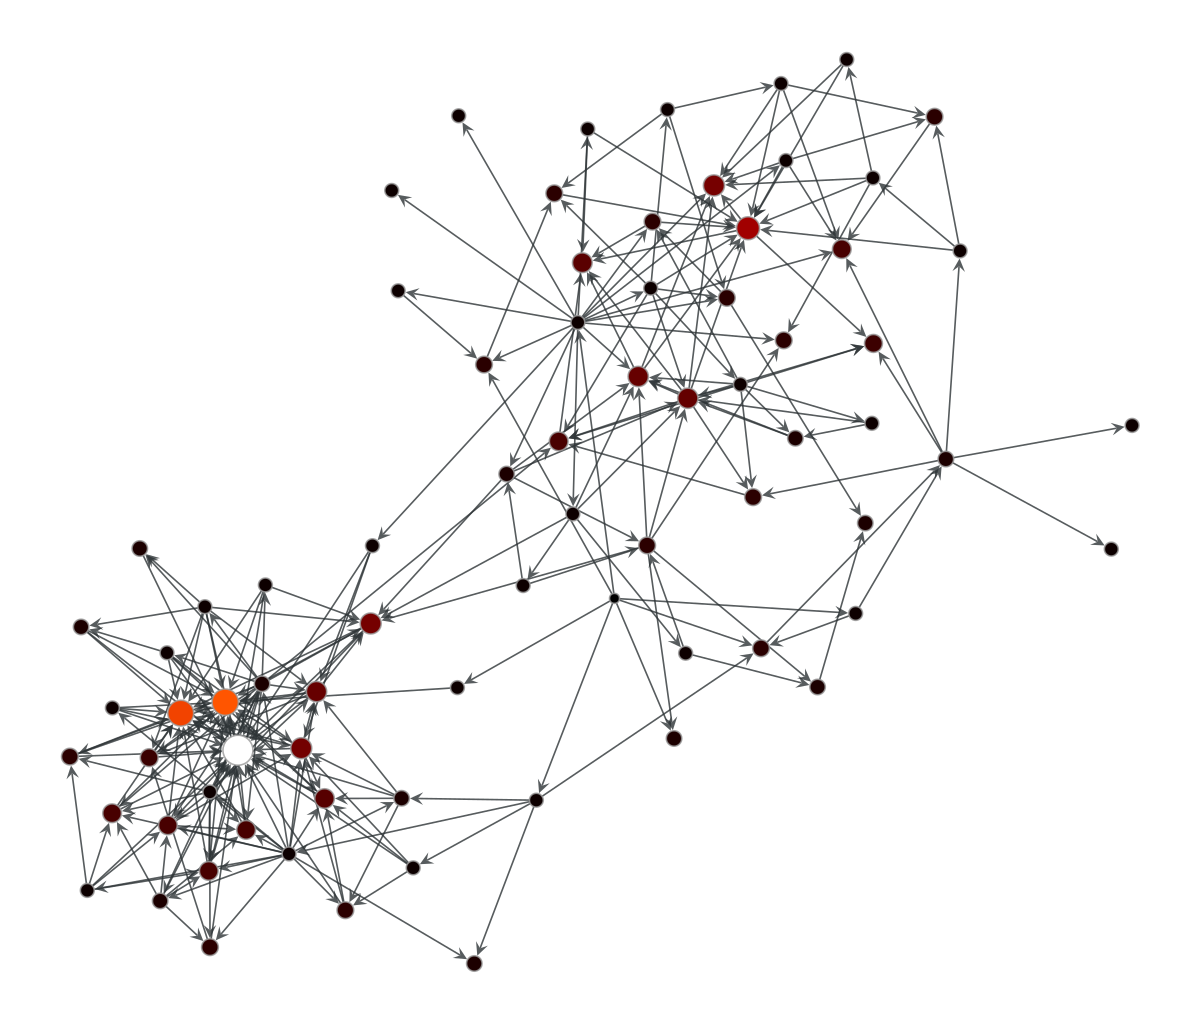

In [10]:
import matplotlib.cm as cm
def draw_katz(g):
    x = gt.katz(g)
    gt.graph_draw(g, 
                vertex_fill_color=x,
                vertex_size=gt.prop_to_size(x, mi=5, ma=15),
                vcmap=cm.gist_heat,
                vorder=x,
                bg_color="white")
draw_katz(g)

Paths to nodes of high centrality

In [11]:
#helpers

package_name = g.vp["_graphml_vertex_id"]
import graph_tool.all as gt

#gets vertex, katz centrality, package name
def get_katz_tuples(g):
    katz_centrality = gt.katz(g)
    katz_tuples = [(int(v), katz_centrality[v]) for v in g.vertices()]
    katz_tuples = sorted(katz_tuples, key=lambda item: item[1], reverse=True)
    katz_tuples = [(v, x, package_name[v]) for v, x in katz_tuples]
    return katz_tuples


#gets all paths to chosen vertices in katz tuples
def get_katz_paths(katz_tuples, g):
    ls_paths = list()
   

    for t,x,name in katz_tuples:
        for s in g.vertices():
            # if s != t:
                paths = list(gt.all_paths(g, s, t, edges=True))
                for path in paths:
                    ls_paths.append(path)
                    # print([(int(e.source()), int(e.target())) for e in path])

    return ls_paths

def get_influenced(katz_paths):
    from itertools import chain
    edges = list(chain.from_iterable(katz_paths))
    vs = set()
    for e in edges:
        vs.add(e.source())
        vs.add(e.target())
    return edges, vs         



(49, 0.14050175899881776, 'System.Runtime/4.3.0')
(41, 0.1306263799020546, 'Microsoft.NETCore.Platforms/1.1.0')
(42, 0.12950746010986716, 'Microsoft.NETCore.Targets/1.1.0')
(20, 0.12327466100588648, 'System.Memory/4.5.5')
(27, 0.11998585043772056, 'System.Buffers/4.5.1')


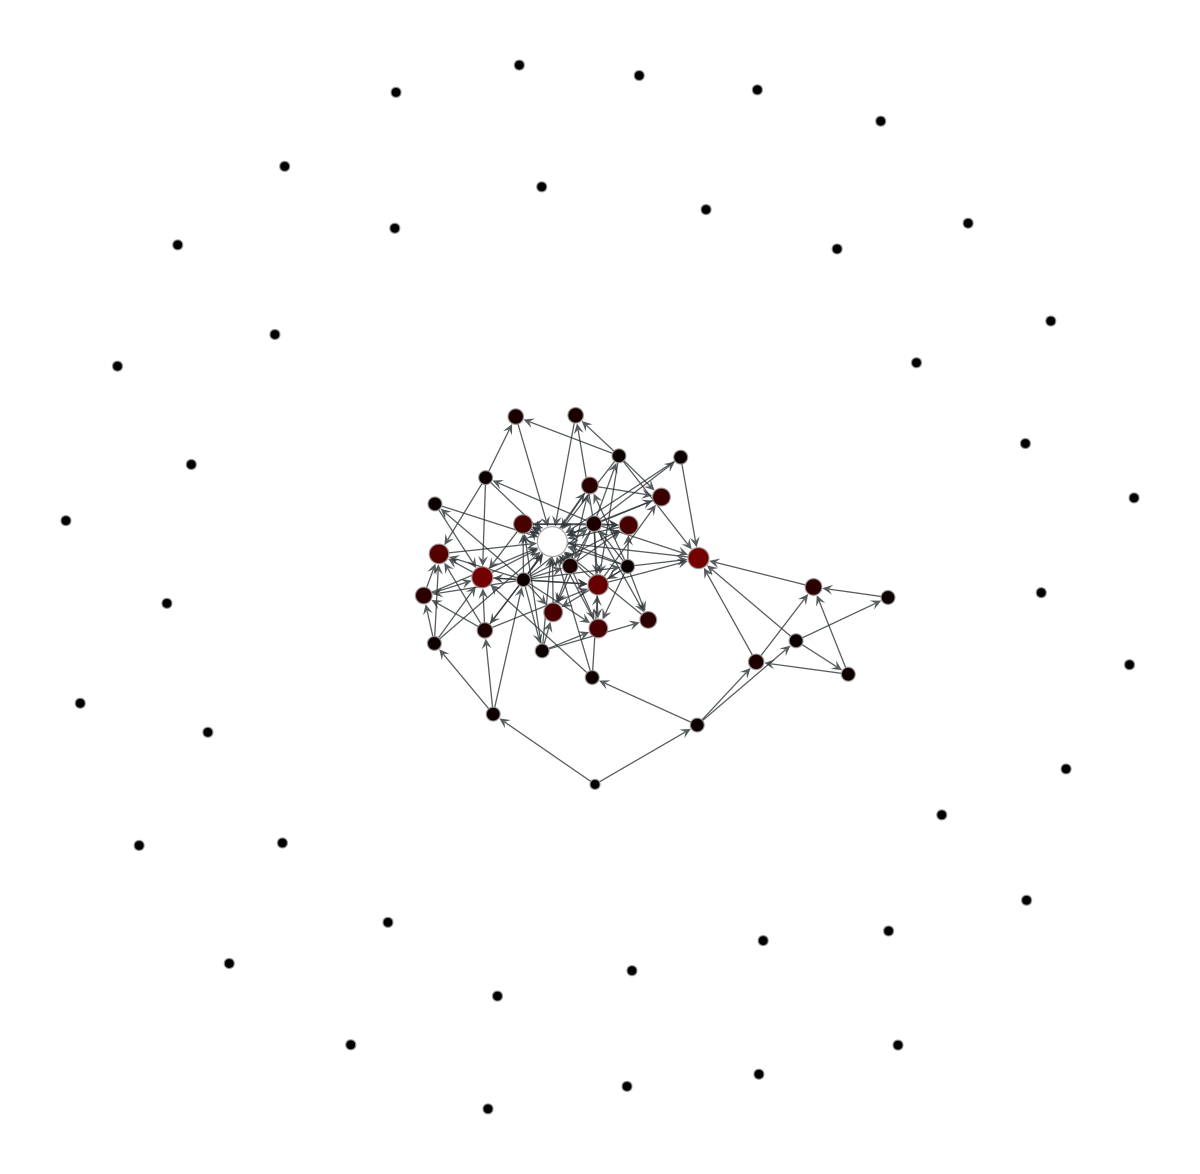

In [12]:
katz_tuples = get_katz_tuples(g)
for kt in katz_tuples[:5]:
    print(kt)
katz_paths = get_katz_paths(katz_tuples[:1], g)
edges, vs = get_influenced(katz_paths)
u = gt.GraphView(g, efilt=lambda e: e in edges )
draw_katz(u)





Edges and vertices to package of highest Katz centrality

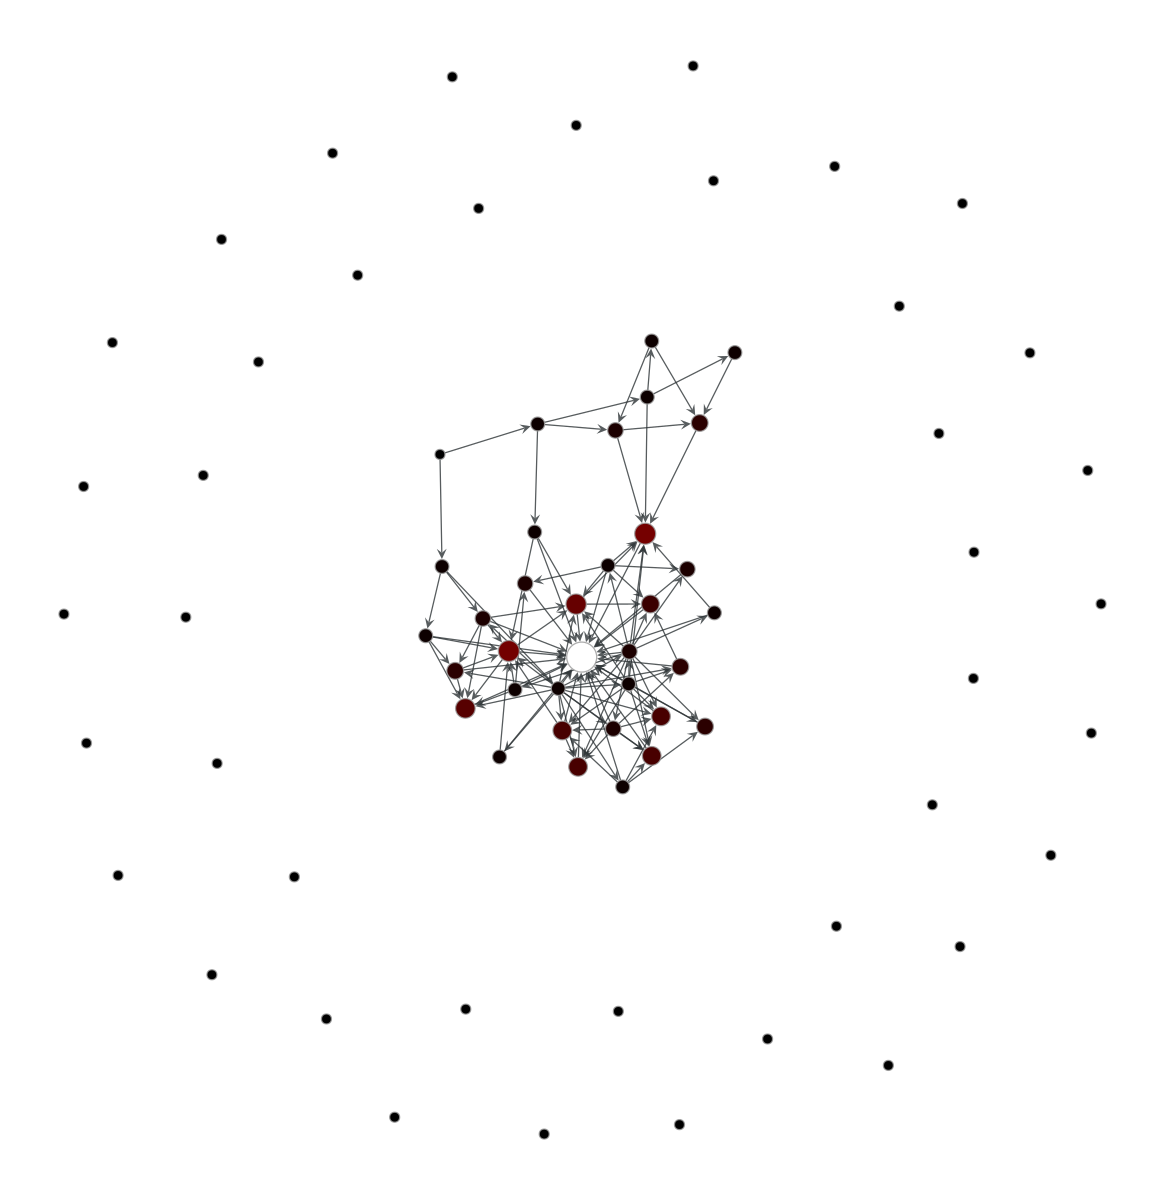

dependents on [(49, 0.14050175899881776, 'System.Runtime/4.3.0')]
0 OpenCDSNETLib/1.0.0
2 Microsoft.Data.SqlClient/5.2.2
7 protobuf-net/2.4.6
23 Microsoft.IdentityModel.JsonWebTokens/6.35.0
24 Microsoft.IdentityModel.Protocols.OpenIdConnect/6.35.0
29 System.Runtime.Loader/4.3.0
36 Microsoft.IdentityModel.Tokens/6.35.0
37 System.Text.Encoding/4.3.0
39 Microsoft.IdentityModel.Protocols/6.35.0
40 System.IdentityModel.Tokens.Jwt/6.35.0
44 System.Reflection.Emit/4.3.0
45 System.Reflection.Emit.Lightweight/4.3.0
47 System.Xml.XmlSerializer/4.3.0
48 System.Collections/4.3.0
49 System.Runtime/4.3.0
50 System.Diagnostics.Debug/4.3.0
53 System.Globalization/4.3.0
54 System.IO/4.3.0
55 System.Threading.Tasks/4.3.0
56 System.IO.FileSystem/4.3.0
57 System.IO.FileSystem.Primitives/4.3.0
58 System.Runtime.Handles/4.3.0
59 System.Linq/4.3.0
60 System.Resources.ResourceManager/4.3.0
61 System.Runtime.Extensions/4.3.0
65 System.Reflection/4.3.0
66 System.Reflection.Primitives/4.3.0
67 System.Reflection.

In [13]:
edges, vs = get_influenced(katz_paths)
u = gt.GraphView(g, efilt=lambda e: e in edges )
draw_katz(u)
print(f"dependents on {katz_tuples[:1]}")
for v in vs:
     print(v, package_name[v])

for p in katz_paths:
     print([(int(e.source()), int(e.target())) for e in p])

influence is most dependencies

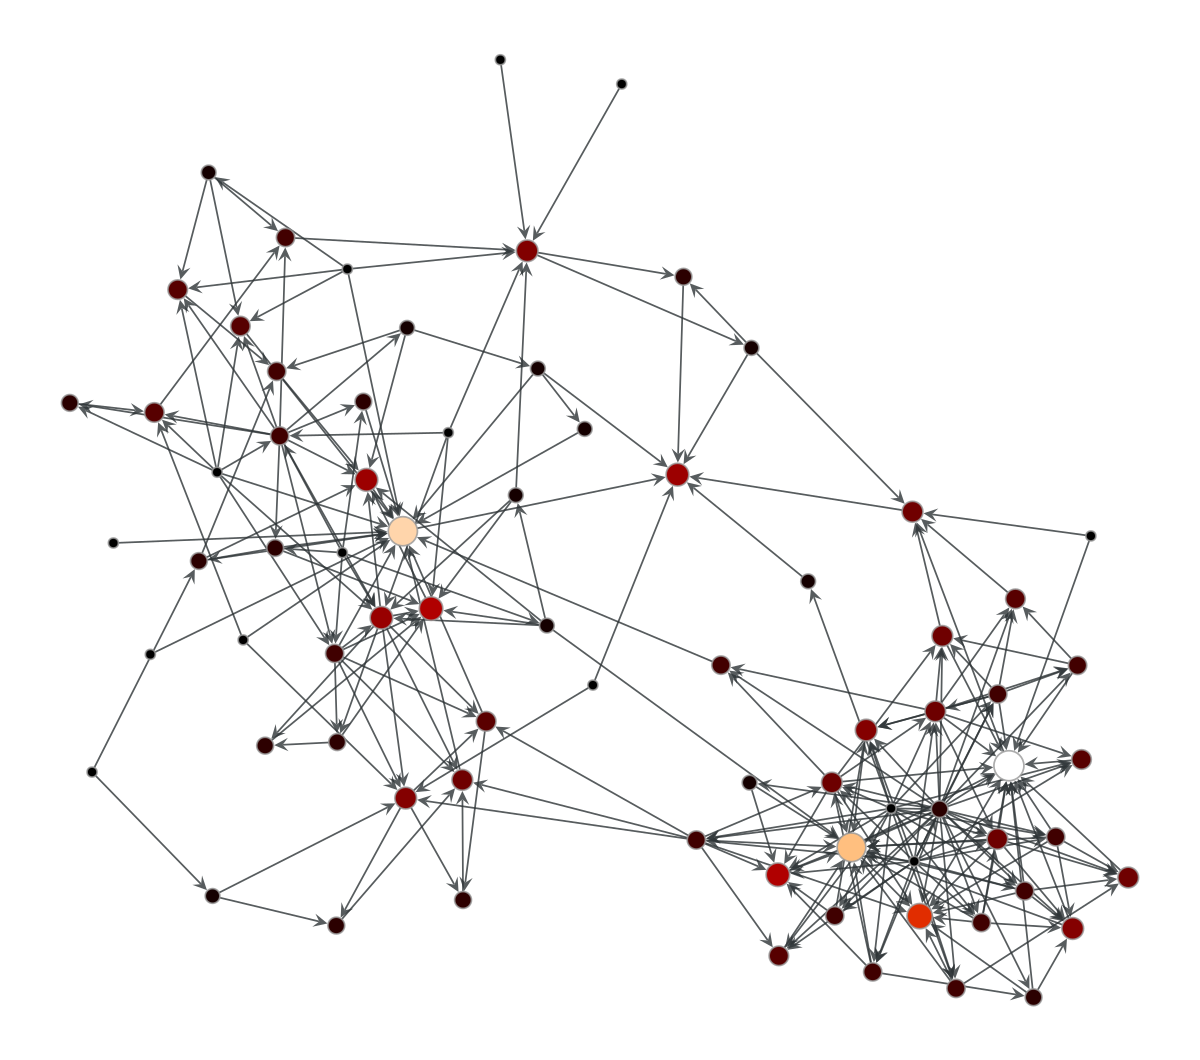

In [14]:


g_reversed = gt.Graph(g, directed=True)
g_reversed.set_reversed(True)  # This reverses the direction of all edges
katz_tuples = get_katz_tuples(g_reversed)
katz_paths = get_katz_paths(katz_tuples[:1], g_reversed)
edges, vs = get_influenced(katz_paths)
draw_katz(g_reversed)


show all dependencies from node with most dependencies

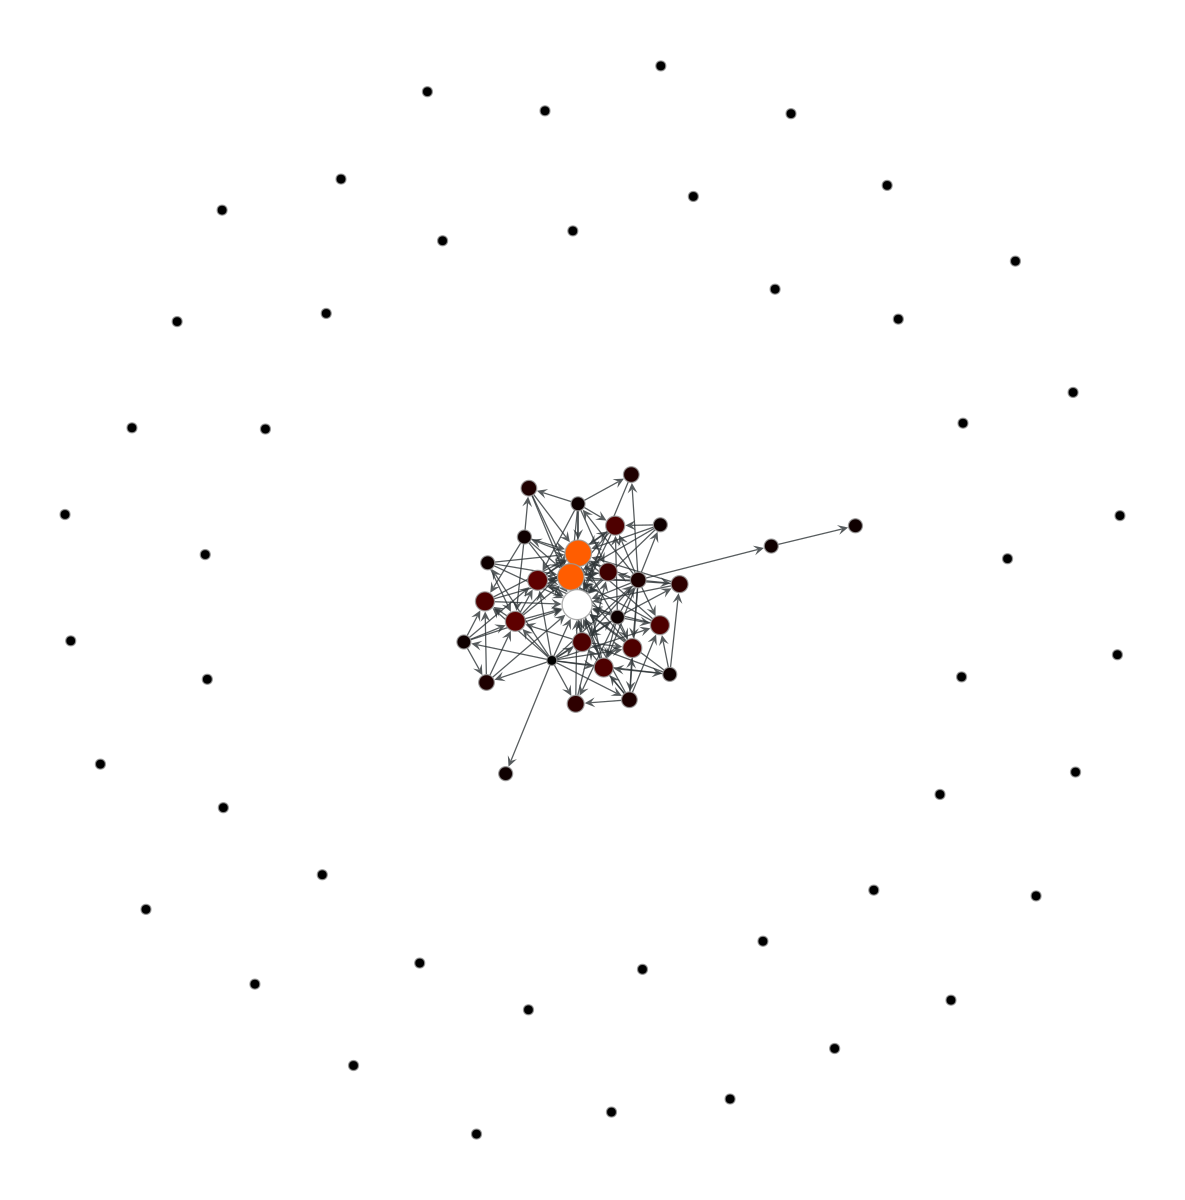

In [15]:
u = gt.GraphView(g, efilt=lambda e: e in edges )
draw_katz(u)


Betweenness

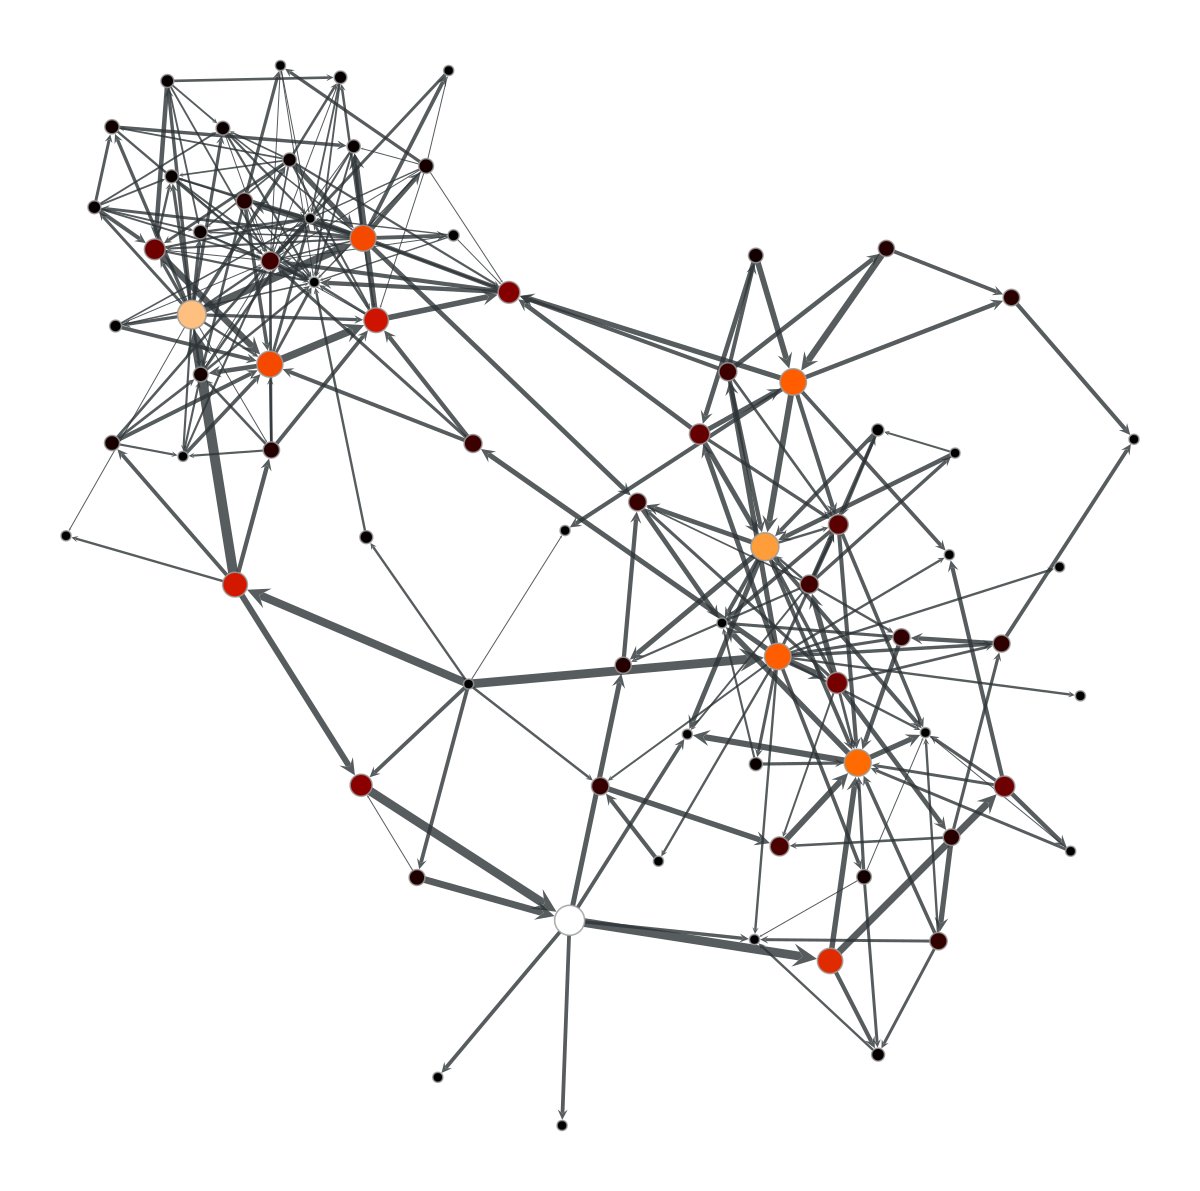

(0.008468468468468469, 'System.Private.ServiceModel/4.10.3')
(0.007385027885027884, 'System.Xml.XmlSerializer/4.3.0')
(0.006816816816816816, 'System.Text.Json/4.7.2')
(0.0060160160160160165, 'System.Memory/4.5.5')
(0.005784641784641784, 'Microsoft.Data.SqlClient/5.2.2')
(0.005765765765765766, 'Microsoft.IdentityModel.Tokens/6.35.0')
(0.005441441441441442, 'System.Xml.ReaderWriter/4.3.0')
(0.0054392249392249395, 'System.Reflection/4.3.0')
(0.004954954954954955, 'System.Security.Cryptography.Xml/6.0.1')
(0.004635778635778636, 'protobuf-net/2.4.6')
(0.00454025454025454, 'System.IO/4.3.0')
(0.003063063063063063, 'System.ServiceModel.Primitives/4.10.3')
(0.0029390819390819395, 'System.Text.Encoding/4.3.0')
(0.0025885885885885886, 'Azure.Identity/1.11.4')
(0.002452523952523953, 'System.Resources.ResourceManager/4.3.0')
(0.0024324324324324323, 'System.Security.Cryptography.Pkcs/6.0.1')
(0.0022478192478192476, 'Microsoft.IdentityModel.JsonWebTokens/6.35.0')
(0.0020230230230230233, 'System.Text

In [16]:
u = gt.GraphView(g)
vp, ep = gt.betweenness(u)
gt.graph_draw(u, vertex_fill_color=vp,
              bg_color="white",
              vertex_size=gt.prop_to_size(vp, mi=5, ma=15),
              edge_pen_width=gt.prop_to_size(ep, mi=0.5, ma=5),
              vcmap=cm.gist_heat)

values = sorted([(vp[v],  package_name[v]) for v in g.vertices()],key=lambda item: item[0], reverse=True)
for tup in values:
    print(tup)

Clustering

In [19]:
import graph_tool.all as gt


# Local Clustering Coefficient
local_clustering = gt.local_clustering(g)
print("Local Clustering Coefficient for each vertex:")
for v in g.vertices():
    print(f"Vertex {int(v)}: {local_clustering[v]}")

# Average Clustering Coefficient (Global Clustering Coefficient)
average_clustering = gt.global_clustering(g)
print(f"Average Clustering Coefficient (Global): {average_clustering}")


Local Clustering Coefficient for each vertex:
Vertex 0: 0.14285714285714285
Vertex 1: 0.0
Vertex 2: 0.0661764705882353
Vertex 3: 0.0
Vertex 4: 0.3333333333333333
Vertex 5: 0.6666666666666666
Vertex 6: 0.5
Vertex 7: 0.2
Vertex 8: 0.3055555555555556
Vertex 9: 0.5
Vertex 10: 1.0
Vertex 11: 0.2
Vertex 12: 0.8333333333333334
Vertex 13: 0.3333333333333333
Vertex 14: 0.3333333333333333
Vertex 15: 0.25274725274725274
Vertex 16: 0.4
Vertex 17: 0.2857142857142857
Vertex 18: 0.3
Vertex 19: 0.3333333333333333
Vertex 20: 0.17582417582417584
Vertex 21: 0.3333333333333333
Vertex 22: 0.0
Vertex 23: 0.4
Vertex 24: 0.13333333333333333
Vertex 25: 0.0
Vertex 26: 0.4
Vertex 27: 0.35714285714285715
Vertex 28: 1.0
Vertex 29: 0.5
Vertex 30: 0.0
Vertex 31: 0.3
Vertex 32: 0.3333333333333333
Vertex 33: 0.0
Vertex 34: 0.0
Vertex 35: 0.2
Vertex 36: 0.16666666666666666
Vertex 37: 0.36363636363636365
Vertex 38: 0.3333333333333333
Vertex 39: 0.3333333333333333
Vertex 40: 0.3333333333333333
Vertex 41: 0.22058823529411